In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:06<00:00, 209MB/s]
100% 1.06G/1.06G [00:06<00:00, 189MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
 # Generators - Discovering the No. of Classes in the dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
def process_image(image , label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

In [8]:
train_ds = train_ds.map(process_image)
validation_ds = validation_ds.map(process_image)

In [9]:
#CNN Model

In [10]:
model = Sequential()

# Layer 1 Convolution Layer
model.add(Conv2D(32,kernel_size=(3,3),padding="VALID",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="VALID"))

# Layer 2 Convolution Layer
model.add(Conv2D(64,kernel_size=(3,3),padding="VALID",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="VALID"))

# Layer 3 Convolution Layer
model.add(Conv2D(128,kernel_size=(3,3),padding="VALID",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="VALID"))


model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
history = model.fit(train_ds,epochs = 5)

Epoch 1/5
625/625 [==============================] - 46s 72ms/step - loss: 0.0314 - accuracy: 0.9901
Epoch 2/5
625/625 [==============================] - 45s 71ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 3/5
625/625 [==============================] - 44s 70ms/step - loss: 0.0204 - accuracy: 0.9938
Epoch 4/5
625/625 [==============================] - 46s 73ms/step - loss: 0.0270 - accuracy: 0.9922
Epoch 5/5
625/625 [==============================] - 44s 70ms/step - loss: 0.0223 - accuracy: 0.9939


In [93]:
model.evaluate(validation_ds)

157/157 [==============================] - 8s 45ms/step - loss: 1.4395 - accuracy: 0.7632


[1.4394516944885254, 0.7631999850273132]

In [39]:
import cv2 as cv

In [94]:
def image_before_prediction_preprocessing(img):
  img = cv.imread(img)
  img = cv.resize(img,(256,256))
  return img

In [107]:
dog_img = image_before_prediction_preprocessing('/content/pitbull.jpg')

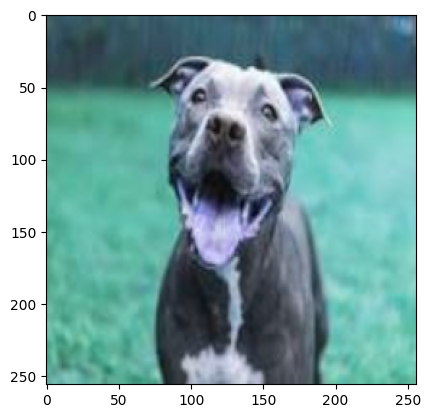

In [108]:
plt.imshow(dog_img)

In [109]:
new_pred = model.predict(dog_img.reshape(1,256,256,3))

1/1 [==============================] - 0s 18ms/step


In [110]:
if new_pred.all() > 0.5:
  print('Dog')
else:
  print('Cat')

Dog


In [111]:
new_pred

array([[1.]], dtype=float32)